In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
data = pd.read_csv("/content/drive/MyDrive/영우_4기_딥러닝/dataset/BostonHousing.csv")

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
x_data = data.copy()
tf.random.set_seed(100)
y_data = x_data.pop('MEDV')

In [6]:
x_data.shape

(506, 13)

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=13, activation='sigmoid' ))
model.add(tf.keras.layers.Dense(128, activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 42,497
Trainable params: 42,497
Non-trainable params: 0
_________________________________________________________________


In [8]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.04)
loss = tf.keras.losses.mean_squared_error 
metrics = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

In [9]:
result = model.fit(x_data, y_data, epochs=100, batch_size=100)

Epoch 1/100
6/6 [==============================] - 1s 4ms/step - loss: 2524.7954 - root_mean_squared_error: 50.2473
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 399.6515 - root_mean_squared_error: 19.9913
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 201.2452 - root_mean_squared_error: 14.1861
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 122.2596 - root_mean_squared_error: 11.0571
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 97.5231 - root_mean_squared_error: 9.8754
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 90.9889 - root_mean_squared_error: 9.5388
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 86.3288 - root_mean_squared_error: 9.2913
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 84.6784 - root_mean_squared_error: 9.2021
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 84.5805 - root_m

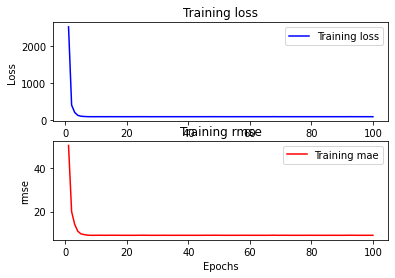

In [10]:
loss = result.history['loss']

# loss 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mae = result.history['root_mean_squared_error']
epochs = range(1, len(mae)+1)

# mae그래프
plt.subplot(212)
plt.plot(epochs, mae, 'r-', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

In [11]:
print(model.evaluate(x_data, y_data))
print("\n Test rmse : %.4f" % (model.evaluate(x_data, y_data)[1]))

16/16 [==============================] - 0s 2ms/step - loss: 84.4322 - root_mean_squared_error: 9.1887
[84.4321517944336, 9.18869686126709]
16/16 [==============================] - 0s 2ms/step - loss: 84.4322 - root_mean_squared_error: 9.1887

 Test rmse : 9.1887
